# Decision Tree Classification

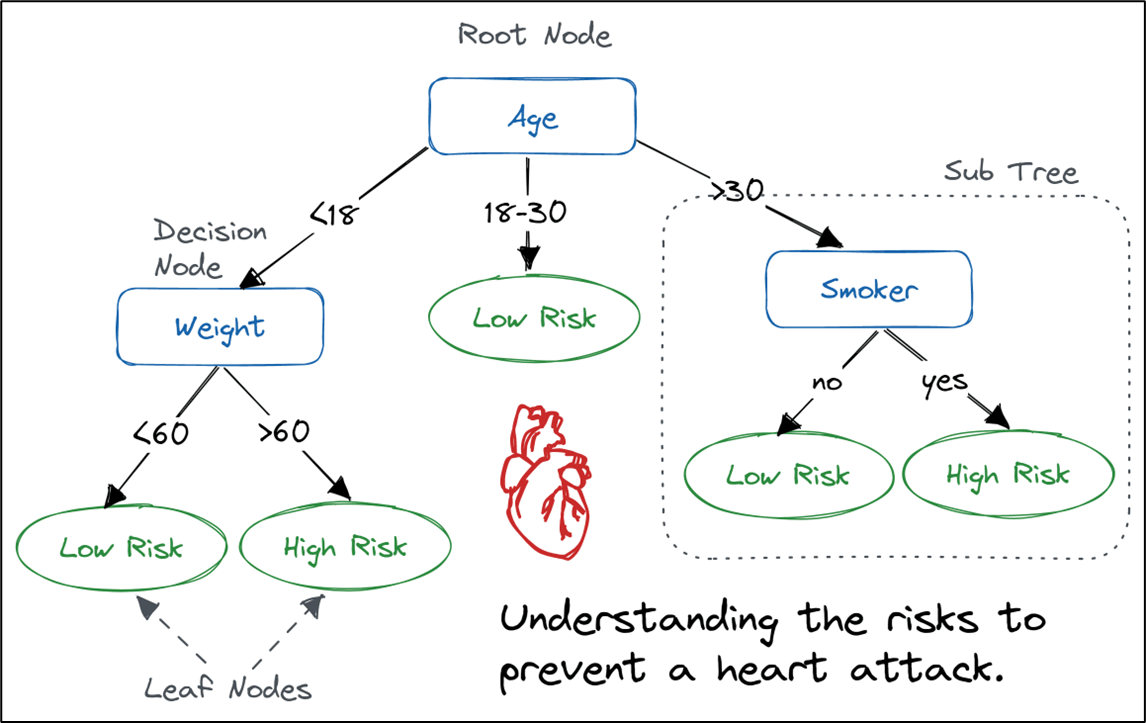

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the Dataset

In [5]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Separate X and Y(Species)

In [9]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Create a Preprocessing pipeline for X

In [12]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe =Pipeline(steps=[('impute',SimpleImputer(strategy= 'mean')),('scaler',StandardScaler())])

In [16]:
X_pre =num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [17]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [18]:
X_pre =pd.DataFrame(X_pre ,columns= cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Train Test spilt

33% in test, 66% in training

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X_pre,Y,test_size=0.33, random_state=21)

In [20]:
xtrain.shape

(100, 4)

In [21]:
xtest.shape

(50, 4)

# Create a Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier(max_depth=1,min_samples_split= 5,min_samples_leaf=3,criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5)

###In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [24]:
model.score(xtrain,ytrain)

0.67

In [25]:
model.score(xtest,ytest)

0.66

# Hyperparameter Tuning

In [26]:
params= {'max_depth' : [1,2,3,4,5,6,7],
         'min_samples_split':[5,6,7,8,9],
         'criterion':['gini','entropy']}

# Scoring Multiclass :f1_macro ,Binary Classification : f1

In [27]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc,param_grid=params, cv=5 , scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [28]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 6}

In [29]:
gscv.best_score_

1.0

In [30]:
best_dtc =gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_split=6)

# Evaluate the Model

In [31]:
best_dtc.score(xtrain,ytrain)

1.0

In [32]:
best_dtc.score(xtest,ytest)

0.94

# Create a Confusion Matrix

In [33]:
ypred_tr =best_dtc.predict(xtrain)
ypred_ts =best_dtc.predict(xtest)

In [34]:
ypred_tr[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [35]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [36]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [37]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [38]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

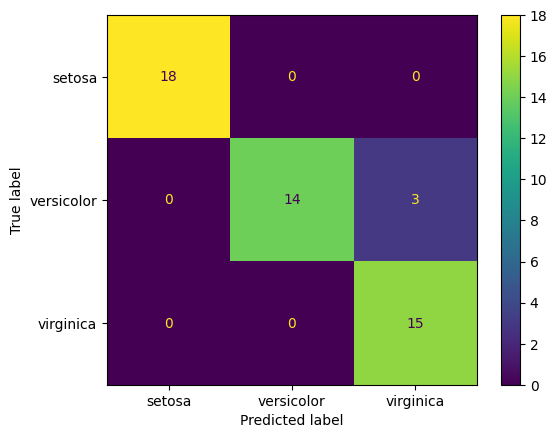

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf =confusion_matrix(ytest,ypred_ts)
cfd =ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

# Print Classification Report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



# Ploting the Decion Tree 

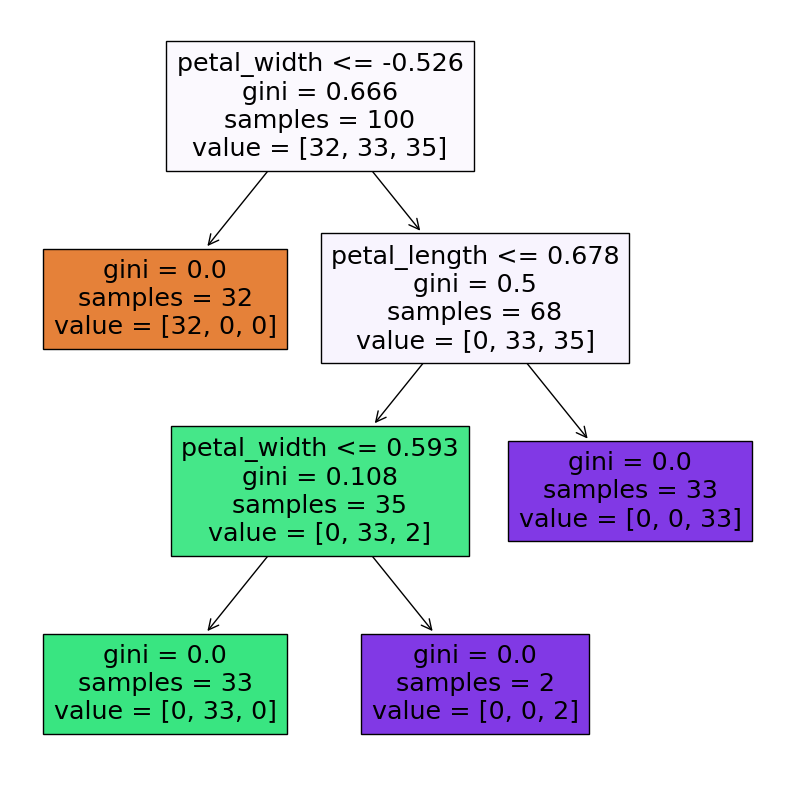

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc,feature_names=list(xtrain.columns), filled= True)
plt.show()

In [44]:
ytrain.value_counts()

species   
virginica     35
versicolor    33
setosa        32
Name: count, dtype: int64